### Pupil Analysis using TobiiStudio raw data
##### by Víctor Varela

In [2]:
# Packages:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import your database:
db = pd.read_csv("Pupils_PA.tsv",header = 0, sep = "\t")

In [4]:
# Show your Database:
db.head()

,ParticipantName,RecordingName,RecordingDuration,MediaName,RecordingTimestamp,KeyPressEventIndex,KeyPressEvent,PupilLeft,PupilRight,Unnamed: 9
0,P01,Rec 01,190214,NaN,4,NaN,NaN,4.86,4.74,NaN
1,P01,Rec 01,190214,NaN,8,NaN,NaN,4.87,4.72,NaN
2,P01,Rec 01,190214,NaN,11,NaN,NaN,4.88,4.79,NaN
3,P01,Rec 01,190214,NaN,14,NaN,NaN,4.91,4.76,NaN
4,P01,Rec 01,190214,NaN,18,NaN,NaN,4.91,4.72,NaN


### Excluding (filtering) irrelevant collumns of your database

In [5]:
# New db contains just the collumns: "ParticipantName","MediaName" and "PupilLeft"
db_0 = db.loc[:,["ParticipantName","MediaName","PupilLeft"]]

# Exclude "NaN" rows in "MediaName" and "PupilLeft" collumns
db_0 = db_0.dropna(subset=["MediaName","PupilLeft"])

# Exclude slide named 'Experimental GFTM.jpg'
db_0 = db_0[db_0.MediaName != 'Experimental GFTM.jpg']

#  Exclude empty "MediaName" rows
db_0 = db_0[db_0.MediaName != '']



In [6]:
# Show your Database:
db_0.head()

,ParticipantName,MediaName,PupilLeft
16819,P01,1.jpg,4.65
16820,P01,1.jpg,4.65
16821,P01,1.jpg,4.65
16822,P01,1.jpg,4.67
16823,P01,1.jpg,4.64


### Setting "ParticipantName" as Database index:

In [7]:
#Save new Database, with "ParticipantName" as index 
db_1 = db_0.set_index("ParticipantName")

In [8]:
# Show your Database:
db_1.head()

,MediaName,PupilLeft
ParticipantName,,
P01,1.jpg,4.65
P01,1.jpg,4.65
P01,1.jpg,4.65
P01,1.jpg,4.67
P01,1.jpg,4.64


### Create vectors to your participants groups:

In [9]:
  # Worst case scenario = Prosopagnosics:
rec_Prosop = ["P30","P07","P27","P20","P06","P38","P15","P14","P33","P41"]
  # Intermediate group one:
rec_Inter_1 = ["P31","P25","P29","P32","P11","P37","P02","P17","P24"]
  # Intermediate group two:
rec_Inter_2 = ["P26","P40","P12","P10","P05","P22","P28","P01","P04","P39"]
  # Best case scenario = Super-Recognizers:
rec_SuperR = ["P19","P23","P13","P35","P36","P16","P21","P18","P09","P03"]

### Create vectors to discriminate your TobiiStudio slides

In [10]:
slides = ["1.jpg","2.jpg","3.jpg","4.jpg","5.jpg","6.jpg","7.jpg","8.jpg","9.jpg","10.jpg",
         "11.jpg","12.jpg","13.jpg","14.jpg","15.jpg","16.jpg","17.jpg","18.jpg","19.jpg",
         "20.jpg","21.jpg","22.jpg","23.jpg","24.jpg","25.jpg","26.jpg","27.jpg","28.jpg",
         "29.jpg","30.jpg","31.jpg","32.jpg","33.jpg","34.jpg","35.jpg","36.jpg","37.jpg",
         "38.jpg","39.jpg","40.jpg"]

### Create separated databases for your groups:

In [28]:
#Prosopagnosics database:
db_Prosop = db_1.loc[rec_Prosop[0:len(rec_Prosop)],["MediaName","PupilLeft"]]

#Super Recognizers Database:
db_SuperR = db_1.loc[rec_SuperR[0:len(rec_SuperR)],["MediaName","PupilLeft"]]

In [29]:
#Show your Databases:

print("######Prosopagnosics Database:######\n")
print(db_Prosop.head())
print("\n\n ####Super Recognizer Database:######\n")
print(db_SuperR.head())

######Prosopagnosics Database:######

                MediaName  PupilLeft
ParticipantName                     
P30                 1.jpg       3.46
P30                 1.jpg       3.46
P30                 1.jpg       3.47
P30                 1.jpg       3.46
P30                 1.jpg       3.47


 ####Super Recognizer Database:######

                MediaName  PupilLeft
ParticipantName                     
P19                 1.jpg       3.15
P19                 1.jpg       3.14
P19                 1.jpg       3.12
P19                 1.jpg       3.15
P19                 1.jpg       3.15


# Calculating Mean and Variance Pupil size

THIS MODULE IS STILL IN VERIFICATION

In [30]:
# Prosopagnosics Database:

meanP = [] #Vector that contains Pupil Mean size from Prosopagnosics Database
varP  = [] #Vector that contains Pupil Variance from Prosopagnosics Database

for i in range (0,len(rec_Prosop)):
    prosop_List = db_Prosop.loc[rec_Prosop[i],"PupilLeft"]
    shorted_List = prosop_List.iloc[0:2000]
    meanP.append(np.mean(np.array(shorted_List)))
    varP.append(np.var(np.array(shorted_List)))
print(meanP)
print(varP)


[3.560435, 3.41121, 3.73483, 3.2229500000000004, 2.9858500000000006, 3.84753, 4.018175, 3.8082350000000003, 4.34068, 4.32749]
[0.013197960774999998, 0.0195814359, 0.006795671099999997, 0.0128833975, 0.021632877499999998, 0.0120545991, 0.015255919375000001, 0.023203834775000005, 0.006533937600000004, 0.0330079999]


In [31]:
# Super Recognizers Database:

meanSR = [] #Vector that contains Pupil Mean size from Prosopagnosics Database
varSR  = [] #Vector that contains Pupil Variance from Prosopagnosics Database
for i in range (0,len(rec_SuperR)):
    SR_List = db_SuperR.loc[rec_SuperR[i],"PupilLeft"]
    shorted_List = SR_List.iloc[0:2000]
    meanSR.append(np.mean(np.array(shorted_List)))
    varSR.append(np.var(np.array(shorted_List)))
print(meanSR)
print(varSR)

[3.263205, 3.676165, 3.089225, 3.9811, 4.13318, 3.8545250000000006, 3.659435, 3.506195, 3.7769800000000004, 4.825285000000001]
[0.021095077974999998, 0.022954842774999998, 0.174078749375, 0.01628589, 0.016304887600000005, 0.022652274374999993, 0.016224930775000004, 0.013837471974999996, 0.019521379599999996, 0.007085018775]


# Plots:

In [32]:
#Reseting index to help plotting:
db_SuperR_aux = db_SuperR.reset_index()
db_Prosop_aux = db_Prosop.reset_index()

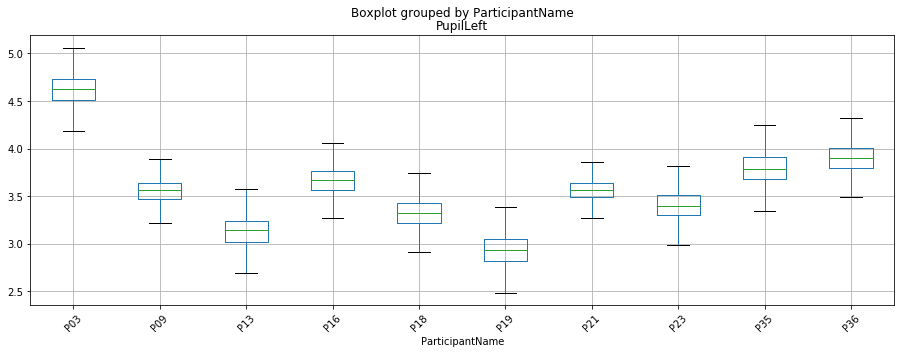

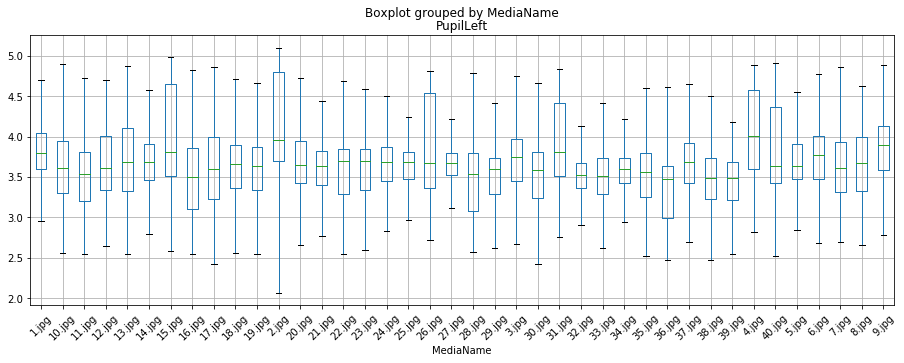

In [33]:
# Super Recognizers:
db_SuperR_aux.boxplot("PupilLeft", "ParticipantName" ,figsize=(15,5),rot=45, 
                      showfliers = False)

db_SuperR_aux.boxplot("PupilLeft", "MediaName" ,figsize=(15,5),rot=45, 
                      showfliers = False)


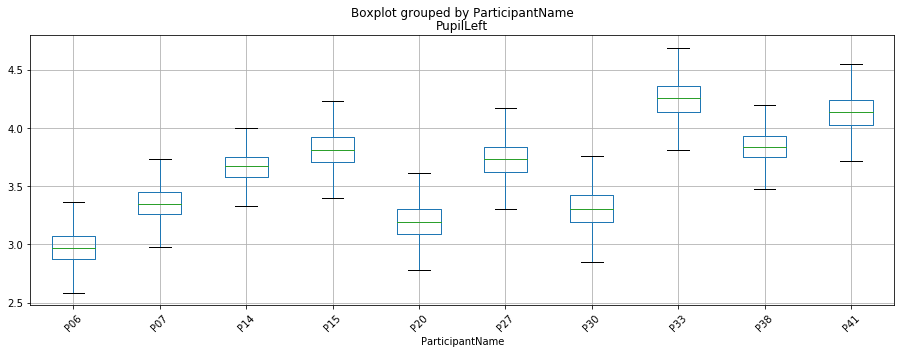

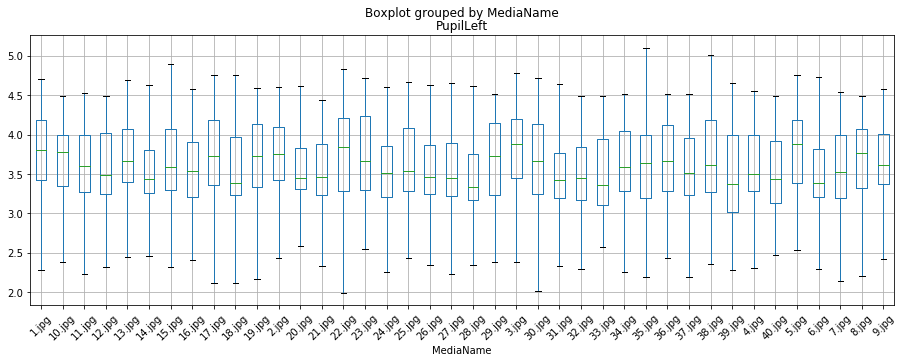

In [34]:
# Prosopagnosics:

db_Prosop_aux.boxplot("PupilLeft", "ParticipantName", figsize=(15,5),rot = 45, showfliers = False)

db_Prosop_aux.boxplot("PupilLeft", "MediaName", figsize=(15,5),rot = 45, showfliers = False)

### Plot Variance:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


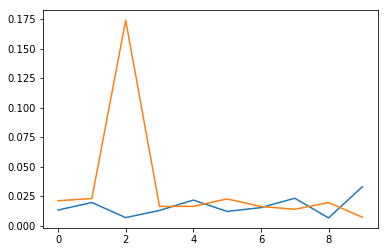

In [312]:
plt.figure()
plt.plot(varP)
plt.hold(True)
plt.plot(varSR)
plt.show()

# Plot Mean:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


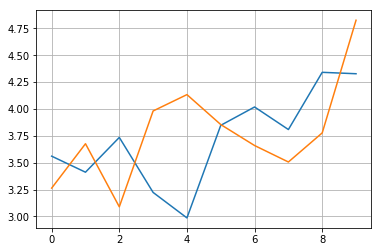

In [315]:
plt.figure()
plt.plot(meanP)
plt.hold(True)
plt.plot(meanSR)
plt.grid(True)
plt.show()